In [1]:
import numpy as np
import matplotlib.pyplot as plt
#iradon
from skimage.transform import iradon
# median_filter
from scipy.ndimage import median_filter
from src.TORFilesReader import ToRFile
from src.AnalyticalReconstruction import AnalyticalReconstruction

In [2]:
# import file
output_path = "C:\\Users\\pedro\\OneDrive\\Ambiente de Trabalho\\all_values.tor"
ToRFile_reader = ToRFile(filepath=output_path)
ToRFile_reader.read()
listModeBody_read = ToRFile_reader.fileBodyData


Reading file: C:\Users\pedro\OneDrive\Ambiente de Trabalho\all_values.tor


In [3]:
geometry = ToRFile_reader.systemInfo
geometry.xRayProducer.setFocalSpotInitialPositionWKSystem([12.55, 0, 0])
geometry.sourcePositionAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"])

geometry.detectorSideBCoordinatesAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], listModeBody_read["IDA"].astype(np.int32))

Calculating source position for all events detected...
Calculating parametric positions of the center and vertices of the detector for all events...
Centroid calculated for all events...
Vertice 0 calculated for all events...
Vertice 1 calculated for all events...
Vertice 2 calculated for all events...
Vertice 3 calculated for all events...
Vertice 4 calculated for all events...
Vertice 5 calculated for all events...
Vertice 6 calculated for all events...
Vertice 7 calculated for all events...
[[[ -6.0762787 -47.95312    -4.56     ]
  [-23.709755  -72.223694   -4.56     ]
  [-22.091587  -73.39936    -4.56     ]
  ...
  [-23.709755  -72.223694   -2.28     ]
  [-22.091587  -73.39936    -2.28     ]
  [ -4.457947  -49.12891    -2.28     ]]

 [[ -6.0762787 -47.95312    29.640001 ]
  [-23.709755  -72.223694   29.640001 ]
  [-22.091587  -73.39936    29.640001 ]
  ...
  [-23.709755  -72.223694   31.92     ]
  [-22.091587  -73.39936    31.92     ]
  [ -4.457947  -49.12891    31.92     ]]

 [[ -

(array([[120., 123., 100., ...,  94.,  93.,   0.],
        [111., 123., 108., ..., 108.,  95.,  98.],
        [105.,  98., 117., ..., 103., 100.,  95.],
        ...,
        [102., 108., 107., ..., 107., 128., 123.],
        [111.,  98., 105., ...,  96., 106.,  96.],
        [117.,  91., 121., ..., 103.,  96., 107.]]),
 array([-358.20001221, -356.40901215, -354.61801208, -352.82701202,
        -351.03601196, -349.2450119 , -347.45401184, -345.66301178,
        -343.87201172, -342.08101166, -340.2900116 , -338.49901154,
        -336.70801147, -334.91701141, -333.12601135, -331.33501129,
        -329.54401123, -327.75301117, -325.96201111, -324.17101105,
        -322.38001099, -320.58901093, -318.79801086, -317.0070108 ,
        -315.21601074, -313.42501068, -311.63401062, -309.84301056,
        -308.0520105 , -306.26101044, -304.47001038, -302.67901031,
        -300.88801025, -299.09701019, -297.30601013, -295.51501007,
        -293.72401001, -291.93300995, -290.14200989, -288.35100983,

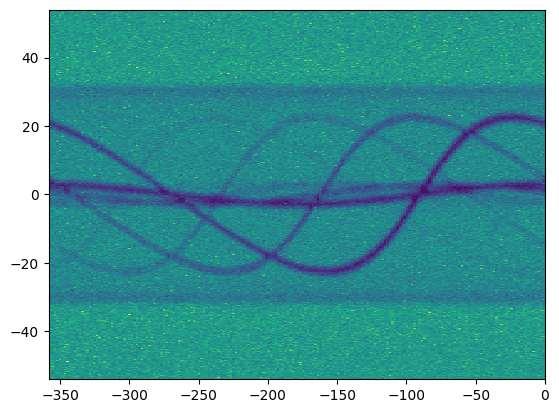

In [4]:
plt.hist2d(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], bins=(200,481))


[[30.        30.        30.        ... 29.985197  29.985197  29.985197 ]
 [-0.        -0.        -0.        ...  0.9423164  0.9423164  0.9423164]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]
18435
3713


C:\Users\pedro\OneDrive\Documentos\GitHub\Infinity-Tomographic-Reconstruction\src\AnalyticalReconstruction\initializer.py:51: FutureWarning: 'filter' is a deprecated argument name for `iradon`. It will be removed in version 0.19. Please use 'filter_name' instead.
  self.im[:, :, k] = iradon(self.michelogram[0][:, :, k].T, theta=theta, circle=True,


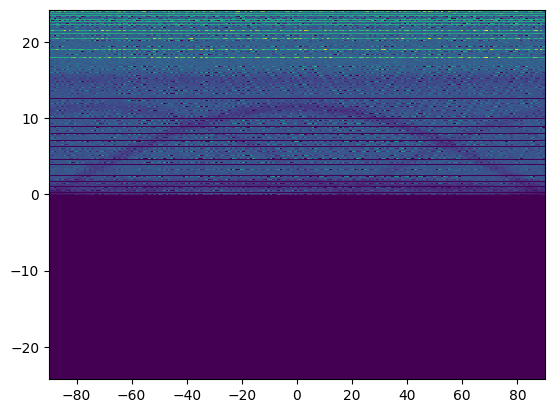

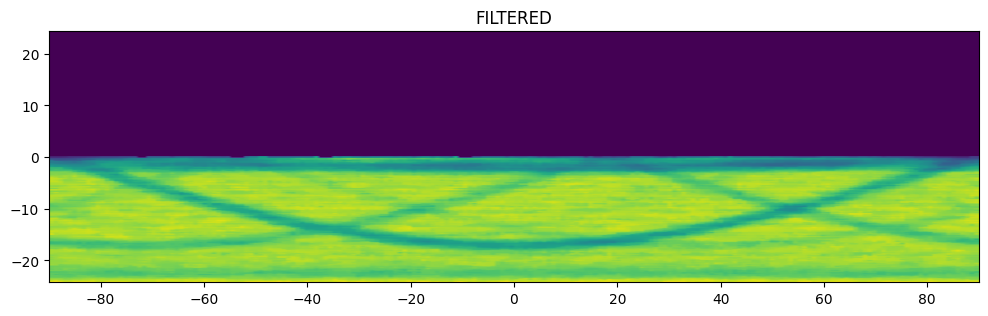

In [5]:
print(geometry._originSystemWK)
midpointFace = (geometry._verticesB[:,7] + geometry._verticesB[:,0]) / 2
analytical=AnalyticalReconstruction(initial_points=geometry.sourceCenter, end_points=geometry.centerFace, rebinning="reb")
number_bins_s =len(np.unique(analytical.sinoClass.s))


number_bins_phi =len(np.unique(analytical.sinoClass.phi))
print(number_bins_phi)
print(number_bins_s)
sino=analytical.sinoClass.projected_sinogram(bins_x=200, bins_y=481, rebining_x=1, rebining_y=1)
sino_filtered = median_filter(sino[0], 5)
sino_filtered = sino_filtered[:,80:-80]
analytical.FBP2D()

plt.figure(figsize=(12,6))
plt.title("FILTERED")

plt.imshow(sino_filtered.T, extent=[sino[1].min(), sino[1].max(), sino[2].min(), sino[2].max()])
#sino_new=sino[0].T
#sino_new=sino_new[9:51,:]
#k=0.25*np.ones([3,3])
#sino_new=signal.convolve(sino[0].T,k,mode='same',)
#im=iradon(sino[0].T, theta=sino[1][:-1], circle=True,
#       filter_name="ramp",
#       output_size=int(sino[0].shape[1]))

# im=iradon_sart(sino[0].T, theta=sino[1][:-1])
# im=analytical.im
theta = np.arange(0,360,1.8)
im=iradon(sino_filtered.T, theta=theta, circle=True,
       filter_name="ramp",
       output_size=int(np.ceil(sino[0].shape[1]*0.7)))


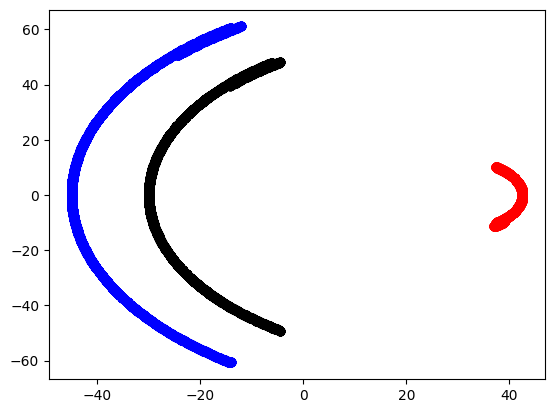

In [6]:
plt.plot(geometry.sourceCenter[:10000,0], geometry.sourceCenter[:10000,1], "ro")
plt.plot(geometry.centerFace[:10000,0], geometry.centerFace[:10000,1], "bo")
# plt.plot(geometry._originSystemWK.T[::10000,0], geometry._originSystemWK.T[::10000,1], "go")
plt.plot(geometry._verticesB[:10000,3,0], geometry._verticesB[:10000,3,1], "ko")

In [110]:
xi = geometry.sourceCenter[:,0]
yi = geometry.sourceCenter[:,1]
xf = midpointFace[:,0]
yf = midpointFace[:,1]


p1 = np.column_stack((xi, yi))
p2 = np.column_stack((xf, yf))
p3 = np.copy(p1) * 0

# phi = phi%360
v1 = p1 - p2
v2 = p2 - p3
n1 = (np.sqrt(v1[:, 0] ** 2 + v1[:, 1] ** 2))

abcissa = (xf - xi)
declive = np.zeros(abcissa.shape)
declive[abcissa != 0] = (yf - yi)[abcissa != 0] / abcissa[abcissa != 0]


# phi[np.sign(xi - xf) == -1] += 180
# phi[np.sign(xi - xf) == -1] *= -1
#
# cross_product = np.cross(v1, v2)
phi = np.degrees(np.arctan(declive))
# phi[np.sign(yi - yf) == -1] += 180

sign_vector = np.sign(np.cross(v1, v2))

# norm_cross_v1_v2 = np.sqrt(cross_product_v1_v2[:, 0] ** 2 + cross_product_v1_v2[:, 1] ** 2)
# sign = cross_product_v1_v2/norm_cross_v1_v2

norm_cross_product = np.array(v1[:, 0] ** 2 + v1[:, 1] ** 2)
dot_pro = p1[:, 0] * v1[:, 0] + p1[:, 1] * v1[:, 1]
t = -dot_pro / norm_cross_product
Q = (p1.T + (t * v1.T)).T
mask_non_zero = Q[:, 0] != 0
phi = np.ones_like(Q[:, 0])*90
phi[mask_non_zero] = np.degrees(np.arctan(Q[mask_non_zero, 1] / Q[mask_non_zero, 0]))
phi[np.sign(yi - yf) == -1] *= -1
s = np.sqrt(Q[:, 0] ** 2 + Q[:, 1] ** 2) *sign_vector
# s = np.sqrt(Q[:, 0] ** 2 + Q[:, 1] ** 2)

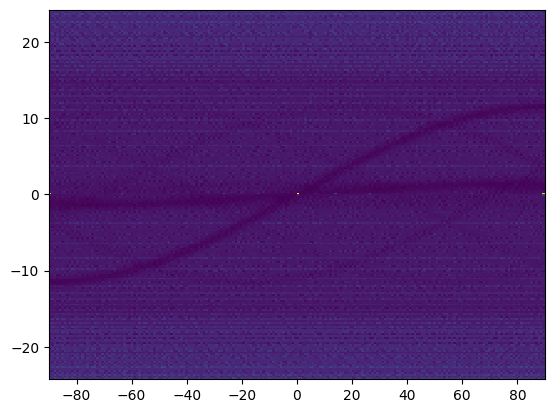

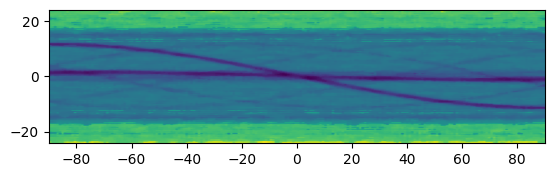

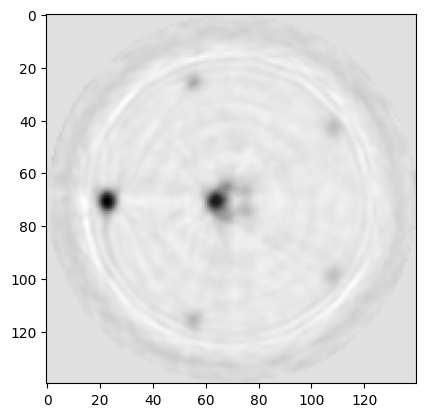

In [112]:
bins_x=200
bins_y=200
s_max = np.abs(s).max()

min_s = -s_max
max_s = s_max
# min_s = s.min()
# max_s = s.max()
max_phi = phi.max()
min_phi = phi.min()
min_z = np.zeros(2)



_projected_sinogram = plt.hist2d(phi, s, bins=[bins_x, bins_y],
                                              range=[[min_phi, max_phi],
                                                     [min_s, max_s]])

theta = np.arange(0,180,1.8)
theta = np.linspace(0, 180, num=bins_x)
sino_filtered = median_filter(_projected_sinogram[0], 5)
# sino_filtered = sino_filtered[:,80:-80]
plt.figure()
plt.imshow(sino_filtered.T, extent=[_projected_sinogram[1][0], _projected_sinogram[1][-1], _projected_sinogram[2][0], _projected_sinogram[2][-1]] )
im=iradon(sino_filtered.T, theta=theta, circle=True,
       filter_name="hann",
       output_size=int(np.ceil(_projected_sinogram[0].shape[1]*0.7)))
plt.figure()
plt.imshow(im, cmap='gray', )

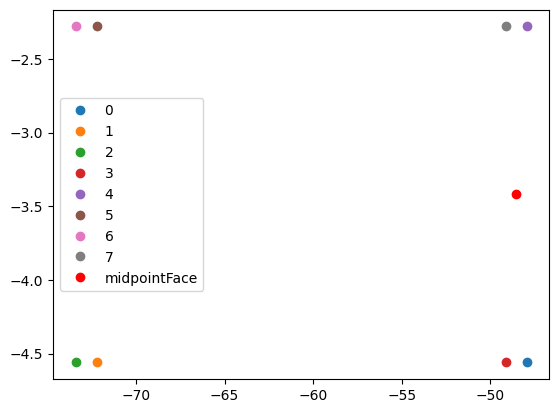

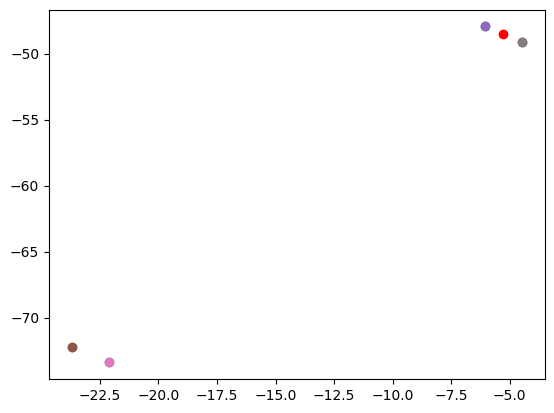

In [106]:
plt.figure()
for i in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,i,1], geometry._verticesB[0,i,2],"o" ,label=i)
    
plt.plot(midpointFace[0,1], midpointFace[0,2], "ro", label="midpointFace")
plt.legend()

plt.figure()
for j in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,j,0], geometry._verticesB[0,j,1],"o" ,label=j)

plt.plot(midpointFace[0,0], midpointFace[0,1], "ro", label="midpointFace")

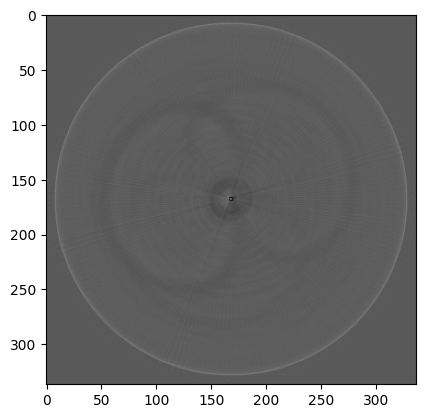

In [8]:
plt.figure()
plt.imshow(im, cmap='gray')